## Causality
#### Author: Karthik Prakash (002728828)

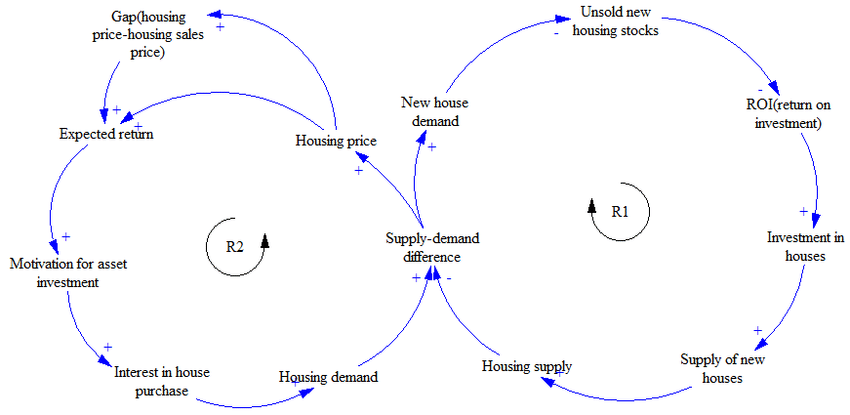

## Table Of Contents
#### 1) Abstract
#### 2) Key Considerations
#### 3) Introduction
#### 4) ARIMA Model
#### 5) About the Code
#### 6) Visualization
#### 7) Conclusion

## Abstract

#### In this notebook we would be learning about Causality with the help of Real-Estate example. In this notebook we have performed the following
###### i) Data Loading and Preprocessing:
###### Uploading the dataset using Google Colab's file upload feature and reading the CSV file and preprocesses the data by handling missing values and checking data types.
###### ii) Granger Causality Test:
###### Conducting a Granger causality test between the 'Assessed Value' and 'Years until sold' variables and printing the p-values for each lag and interpreting the statistical significance of the causality.
###### iii) ARIMA Time Series Forecasting:
###### Spliting the data into training and testing sets.Fits an ARIMA [AutoRegressive Integrated Moving Average] model to the 'Assessed Value' time series using the training data.Makeing predictions on the test set using the trained model.
###### iv) Evaluation of ARIMA Model:
###### Calculating and printing Mean Squared Error [MSE] and Root Mean Squared Error [RMSE] to assess the predictive accuracy of the ARIMA model.
###### v) Visualization:
###### Generates a plot comparing the observed values from both the training and testing sets with the predicted values from the ARIMA model.

## Key Considerations

###### i) Parameter Adjustment:
###### Parameters such as the maximum lag for the Granger causality test and the ARIMA model order can be adjusted based on the specific requirements.
###### ii) Interpretation:
###### The p-values from the Granger causality test help interpret the potential causal relationship, while MSE and RMSE provide insights into the accuracy of the ARIMA model.

## Introduction

###### Causality refers to the relationship between cause and effect, where one event [the cause] brings about another event [the effect].

###### Let's understand it more simply
###### i) Cause and Effect:
###### Cause: The factor or event that produces an effect.
###### Effect: The outcome or result of a cause.

###### ii) Temporal Order:
###### Causation implies a temporal sequence, where the cause precedes the effect in time. The cause and effect must occur in the right order for a causal relationship to exist.

###### iii) Correlation vs. Causation:
###### Correlation is a statistical association between two variables, but it doesn't imply causation. It's crucial to differentiate between correlation and causation to avoid making incorrect assumptions.

###### iv) Necessary and Sufficient Conditions:
###### A necessary condition is something that must be present for a particular effect to occur.
###### A sufficient condition is something that, if present, guarantees the occurrence of a particular effect.And many more

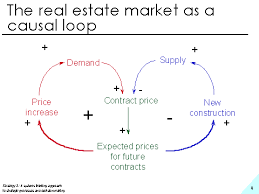


## ARIMA Model [Autoregressive Integrated Moving Average]

###### It is a statistical method used for time series forecasting.
###### The ARIMA model is a combination of three components: Autoregressive [AR], Integrated [I], and Moving Average [MA].

###### Let's understand these 3 components:
###### i) Autoregressive (AR):
###### The "AR" component refers to the autoregressive part of the model. It involves predicting a future value based on its past values. In other words, the future value is assumed to be a linear combination of its previous values.
###### ii) Integrated (I):
###### The "I" component stands for integrated. This component involves differencing the time series data to make it stationary. Stationarity is a key assumption in time series analysis. Stationary data has a constant mean and variance over time, making it easier to model.
###### iii) Moving Average (MA):
###### The "MA" component refers to the moving average part of the model. It involves modeling the relationship between the current value and a residual error from a moving average model applied to lagged observations.

###### When combined, the ARIMA model is expressed as ARIMA(p, d, q), where:
###### p: Order of the autoregressive (AR) component.
###### d: Degree of differencing required to make the time series stationary (integration).
###### q: Order of the moving average (MA) component.

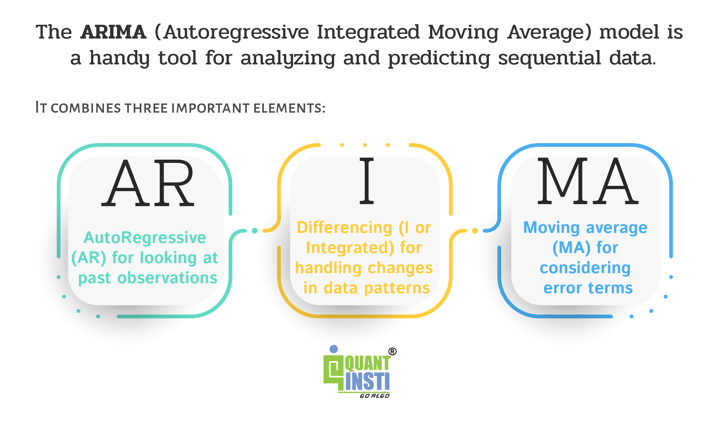

## Code

In [1]:
# importing the Real-Estate Dataset from the local
from google.colab import files
uploaded = files.upload()

Saving Real_Estate_Sales_2001-2020_GL.csv to Real_Estate_Sales_2001-2020_GL.csv


In [3]:
# importing necessary libraries
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.eval_measures import mse, rmse

In [4]:
# Reading the upladed CSV file
file_name = next(iter(uploaded))
data = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

In [5]:
print(data.head())

   Serial Number  List Year Date Recorded     Town                Address  \
0        2020348       2020     9/13/2021  Ansonia        230 WAKELEE AVE   
1          20002       2020     10/2/2020  Ashford        390 TURNPIKE RD   
2         200212       2020      3/9/2021     Avon       5 CHESTNUT DRIVE   
3         200243       2020     4/13/2021     Avon  111 NORTHINGTON DRIVE   
4         200377       2020      7/2/2021     Avon     70 FAR HILLS DRIVE   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0          150500     325000.0       0.4630    Commercial              Nan   
1          253000     430000.0       0.5883   Residential    Single Family   
2          130400     179900.0       0.7248   Residential            Condo   
3          619290     890000.0       0.6958   Residential    Single Family   
4          862330    1447500.0       0.5957   Residential    Single Family   

   Years until sold  
0                 1  
1                 0  
2 

In [6]:
print(data.isnull().sum())

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Years until sold    0
dtype: int64


In [7]:
data = data.dropna()

In [8]:
print(data.dtypes)

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value        int64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Years until sold      int64
dtype: object


In [9]:
# Granger Causality Test
max_lag = 5

###### -> max_lag: The maximum lag to consider in the Granger causality test.

In [10]:
# Perform Granger causality test
gc_test_result = grangercausalitytests(data[['Assessed Value', 'Years until sold']], max_lag, verbose=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2586  , p=0.0391  , df_denom=997209, df_num=1
ssr based chi2 test:   chi2=4.2586  , p=0.0391  , df=1
likelihood ratio test: chi2=4.2586  , p=0.0391  , df=1
parameter F test:         F=4.2586  , p=0.0391  , df_denom=997209, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3137  , p=0.0989  , df_denom=997206, df_num=2
ssr based chi2 test:   chi2=4.6274  , p=0.0989  , df=2
likelihood ratio test: chi2=4.6274  , p=0.0989  , df=2
parameter F test:         F=2.3137  , p=0.0989  , df_denom=997206, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5501  , p=0.1993  , df_denom=997203, df_num=3
ssr based chi2 test:   chi2=4.6503  , p=0.1993  , df=3
likelihood ratio test: chi2=4.6503  , p=0.1993  , df=3
parameter F test:         F=1.5501  , p=0.1993  , df_denom=997203, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.

###### -> grangercausalitytests(): Performs the Granger causality test between two time series variables. The results are stored in gc_test_result.


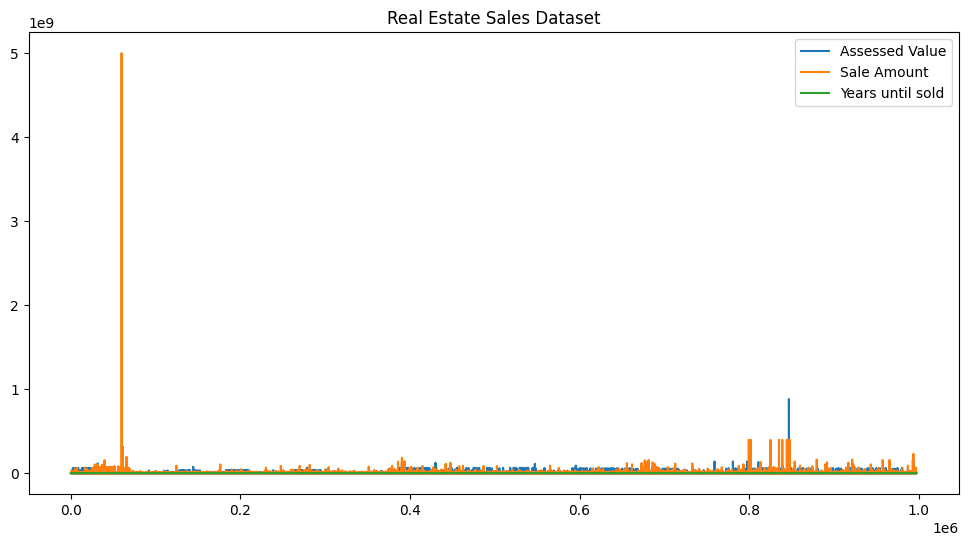

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data['Assessed Value'], label='Assessed Value')
plt.plot(data['Sale Amount'], label='Sale Amount')
plt.plot(data['Years until sold'], label='Years until sold')
plt.legend()
plt.title('Real Estate Sales Dataset')
plt.show()

In [12]:
# Print the results
for lag in range(1, max_lag + 1):
    p_value = gc_test_result[lag][0]['ssr_ftest'][1]
    print(f'Granger causality test for lag {lag}: p-value = {p_value}')

Granger causality test for lag 1: p-value = 0.03905239946039163
Granger causality test for lag 2: p-value = 0.09889700843110587
Granger causality test for lag 3: p-value = 0.19927198355940096
Granger causality test for lag 4: p-value = 0.004114096731538998
Granger causality test for lag 5: p-value = 0.00518744833165275


###### -> Prints the p-values from the Granger causality test for each lag.


In [13]:
residuals = gc_test_result[max_lag][0]['ssr_ftest'][2]

###### -> Extracts the residuals from the Granger causality test results.


In [14]:
mse_value = mse(data['Years until sold'].iloc[max_lag:], residuals)
rmse_value = rmse(data['Years until sold'].iloc[max_lag:], residuals)
print(f'Mean Squared Error (MSE): {mse_value}')
print(f'Root Mean Squared Error (RMSE): {rmse_value}')

Mean Squared Error (MSE): 994400359220.2726
Root Mean Squared Error (RMSE): 997196.2491005833


###### -> Calculates and prints the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) between the 'Years until sold' variable and the extracted residuals.


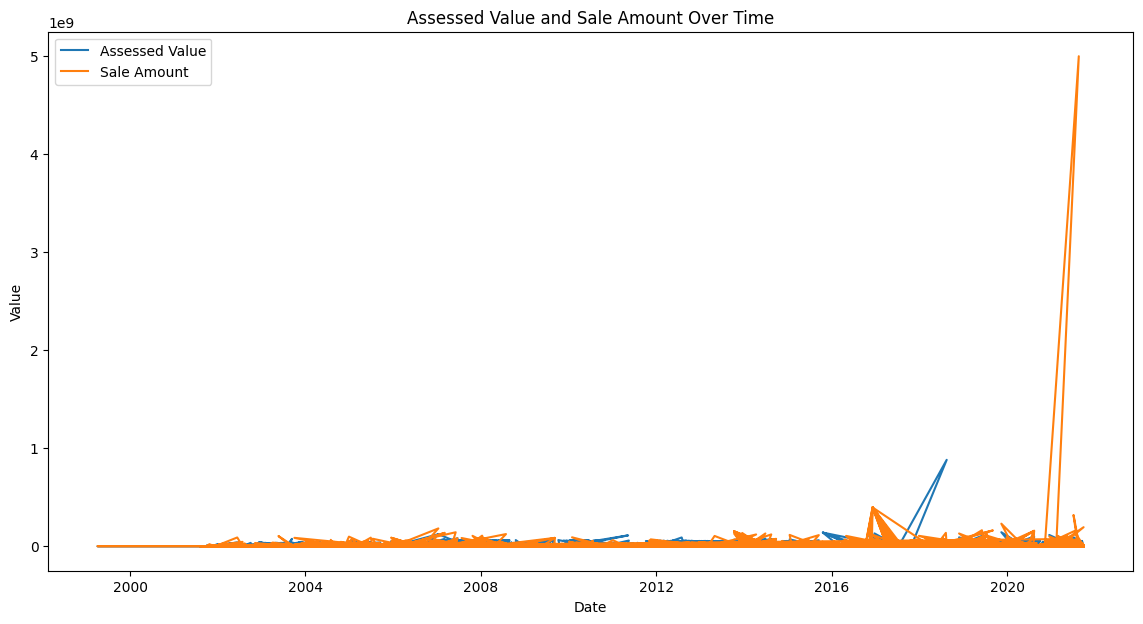

In [15]:
# Time Series Visalualization
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])
data.set_index('Date Recorded', inplace=True)

# Visualize 'Assessed Value' and 'Sale Amount' over time
plt.figure(figsize=(14, 7))
plt.plot(data['Assessed Value'], label='Assessed Value')
plt.plot(data['Sale Amount'], label='Sale Amount')
plt.title('Assessed Value and Sale Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [16]:
# Correlation Matrix

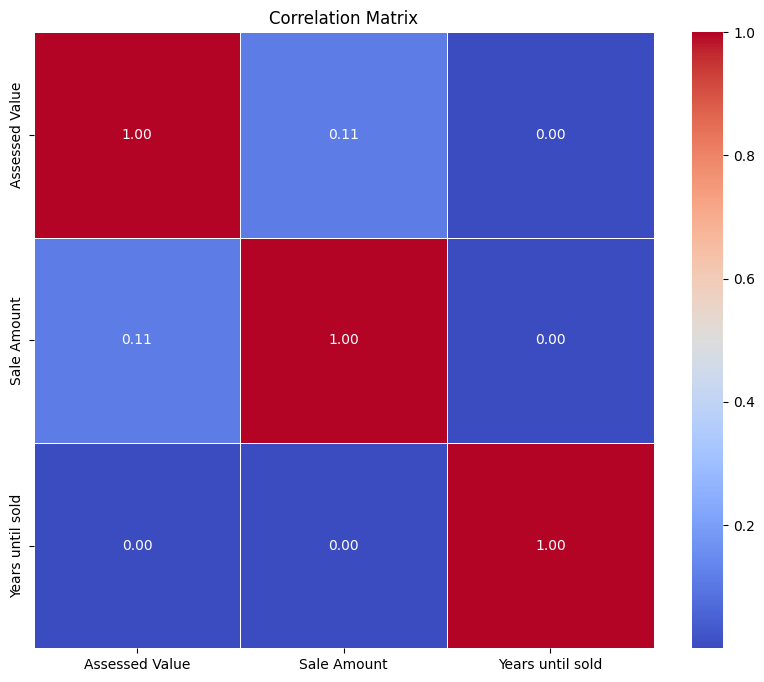

In [17]:
# Calculate and visualize the correlation matrix
correlation_matrix = data[['Assessed Value', 'Sale Amount', 'Years until sold']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [18]:
for lag in range(1, max_lag + 1):
    test_result = gc_test_result[lag][0]
    p_value = test_result['ssr_ftest'][1]
    print(f'Granger causality test for lag {lag}: p-value = {p_value:.4f}')
    print(f'Causality Conclusion: {"Significant" if p_value < 0.05 else "Not Significant"}\n')


Granger causality test for lag 1: p-value = 0.0391
Causality Conclusion: Significant

Granger causality test for lag 2: p-value = 0.0989
Causality Conclusion: Not Significant

Granger causality test for lag 3: p-value = 0.1993
Causality Conclusion: Not Significant

Granger causality test for lag 4: p-value = 0.0041
Causality Conclusion: Significant

Granger causality test for lag 5: p-value = 0.0052
Causality Conclusion: Significant



###### -> Print detailed Granger causality test results


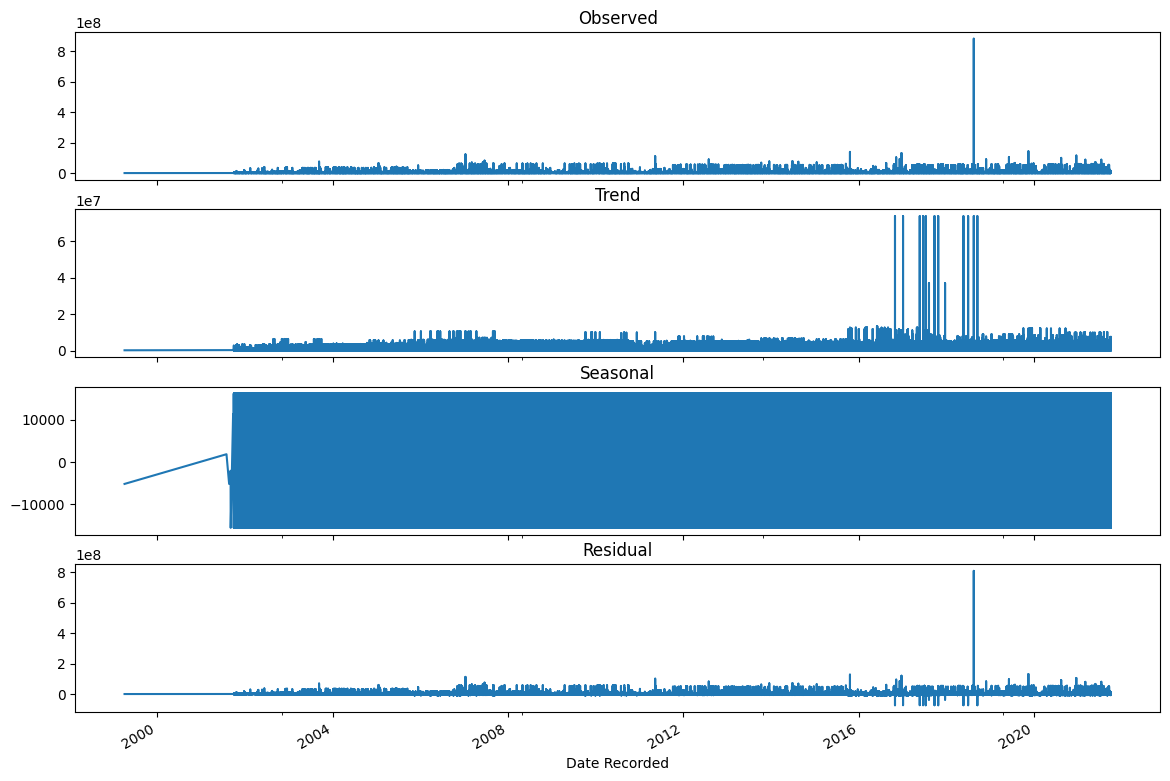

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(data['Assessed Value'], model='additive', period=12)

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')
plt.show()


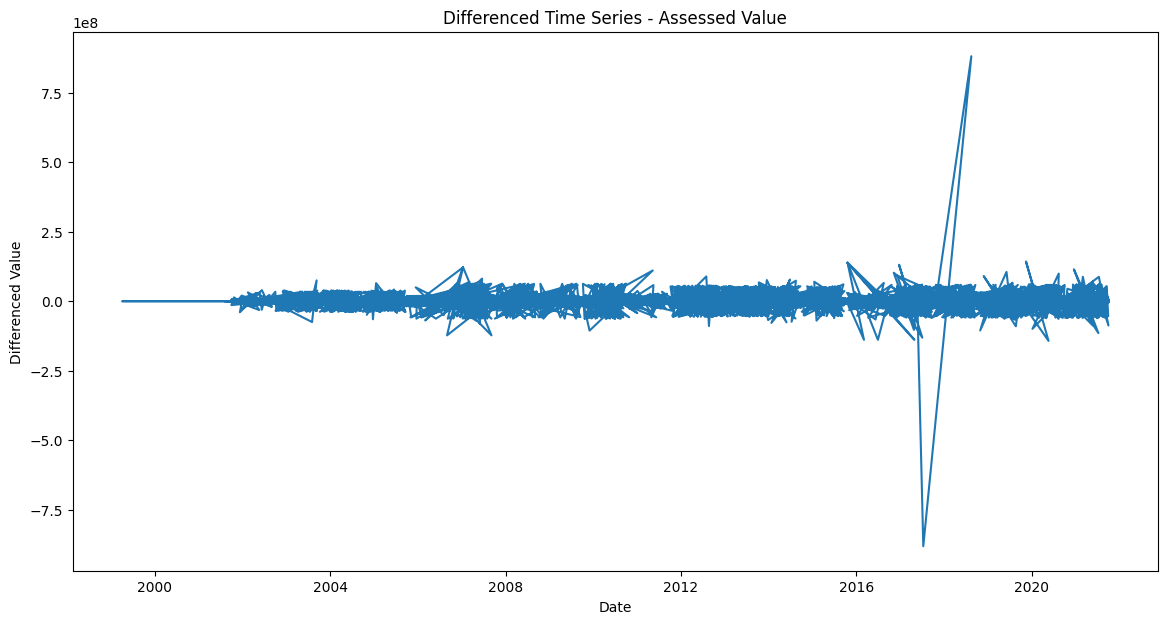

In [20]:
# Time Series

data['Assessed Value_diff'] = data['Assessed Value'].diff()

# Plot the differenced time series
plt.figure(figsize=(14, 7))
plt.plot(data['Assessed Value_diff'])
plt.title('Differenced Time Series - Assessed Value')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.show()


In [21]:
# Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


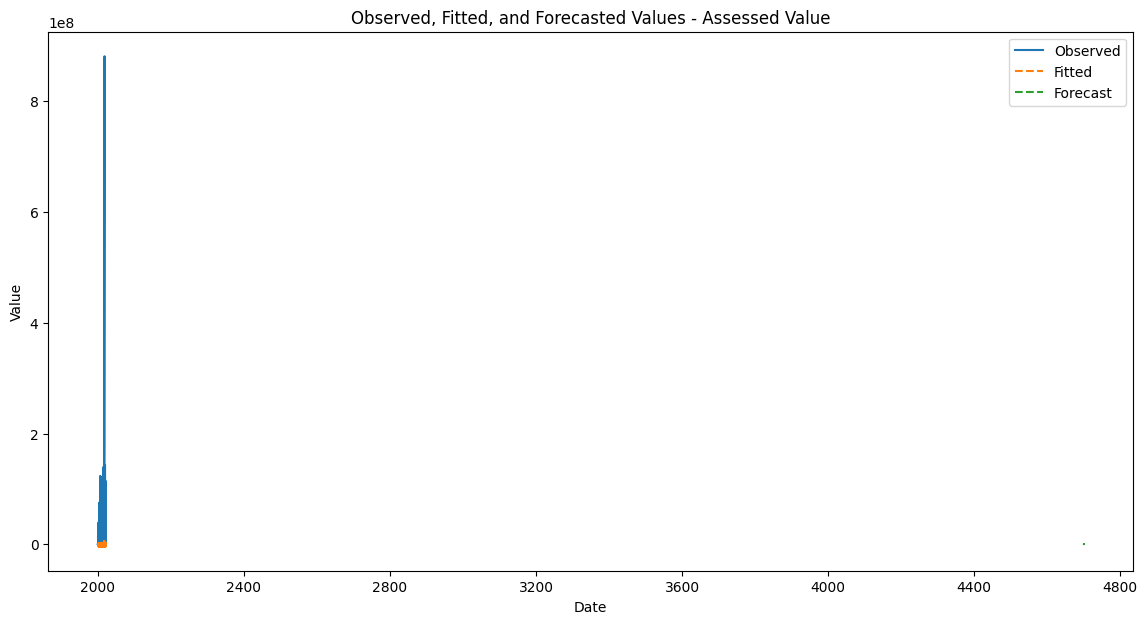

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


model = ExponentialSmoothing(data['Assessed Value'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)

# Plot the observed values and forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Assessed Value'], label='Observed')
plt.plot(fit.fittedvalues, label='Fitted', linestyle='--')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Observed, Fitted, and Forecasted Values - Assessed Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [23]:
# Analyzing Granger Causality Test Results
for lag in range(1, max_lag + 1):
    test_result = gc_test_result[lag][0]
    p_value = test_result['ssr_ftest'][1]
    print(f'Granger causality test for lag {lag}: p-value = {p_value:.4f}')

    # Interpretation
    if p_value < 0.05:
        print('Causality is statistically significant.')
        # You can also print additional information or make further analyses here.
    else:
        print('Causality is not statistically significant.')

    print('\n')


Granger causality test for lag 1: p-value = 0.0391
Causality is statistically significant.


Granger causality test for lag 2: p-value = 0.0989
Causality is not statistically significant.


Granger causality test for lag 3: p-value = 0.1993
Causality is not statistically significant.


Granger causality test for lag 4: p-value = 0.0041
Causality is statistically significant.


Granger causality test for lag 5: p-value = 0.0052
Causality is statistically significant.




###### -> If the p-value is less than 0.05, you may conclude that there is evidence to reject the null hypothesis, suggesting a significant causal relationship.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error (MSE): 6642977656475.93
Root Mean Squared Error (RMSE): 2577397.46


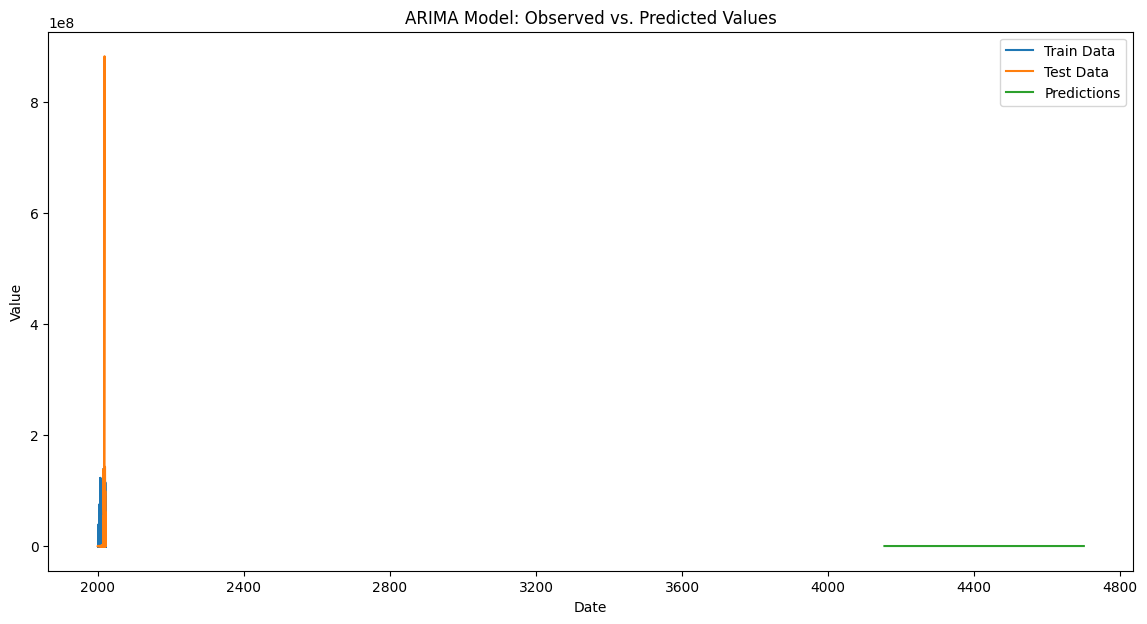

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


target_variable = 'Assessed Value'

# Train-test split
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Fit ARIMA model
order = (1, 1, 1)
model = ARIMA(train_data[target_variable], order=order)
fit_model = model.fit()

# Make predictions on the test set
predictions = fit_model.predict(start=len(train_data), end=len(data) - 1, typ='levels')

# Evaluate predictive accuracy
mse_value = mean_squared_error(test_data[target_variable], predictions)
rmse_value = mean_squared_error(test_data[target_variable], predictions, squared=False)

print(f'Mean Squared Error (MSE): {mse_value:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_value:.2f}')

# Plot observed vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(train_data[target_variable], label='Train Data')
plt.plot(test_data[target_variable], label='Test Data')
plt.plot(predictions, label='Predictions')
plt.title('ARIMA Model: Observed vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


## Conclusion:
###### The Granger causality test helps to identify whether there is a statistically significant causal relationship between the selected variables.The ARIMA model provides a forecasting tool for predicting future values of the 'Assessed Value' variable.The combination of statistical testing and forecasting contributes to a more comprehensive understanding of the dynamics within the financial dataset.
